### Semana 3: Geodésicas tipo tiempo

#### Análisis de signo de la segunda derivada del potencial:

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use('bmh')

In [2]:
#Símbolos:
r,m,h = sp.symbols('r,m,h', positive = True)

La segunda derivada del potencial es
$$
\tilde{V}''(r) = 2m \left[ -\frac{2}{r^3} + \frac{3h^2m}{r^4} - \frac{12h^2m^2}{r^5} \right]
$$
con extremos locales en 
$$
r_A = \frac{mh^2}{2} \left(1 - \sqrt{1 - \frac{12}{h^2}} \right), \quad r_B =\frac{mh^2}{2} \left(1 + \sqrt{1 - \frac{12}{h^2}} \right).
$$

In [3]:
#Segunda derivada del potencial:
d2Vdx2 = 2*m*(-2/r**3 + 3*h**2*m/r**4 - 12*h**2*m**2/r**5)
display(d2Vdx2)

2*m*(-12*h**2*m**2/r**5 + 3*h**2*m/r**4 - 2/r**3)

In [4]:
#Extremos:
rA = (m*h**2/2)*(1 - sp.sqrt(1 - 12/h**2))
rB = (m*h**2/2)*(1 + sp.sqrt(1 - 12/h**2))

In [5]:
#Evaluación de la segunda derivada en los extremos:
dV_rA = sp.simplify(d2Vdx2.subs(r,rA))
dV_rB = sp.simplify(d2Vdx2.subs(r,rB))

display(dV_rA)
display(dV_rB)

32*(3*h*(-h + sqrt(h**2 - 12)) + (-h + sqrt(h**2 - 12))**2 + 24)/(h**3*m**2*(-h + sqrt(h**2 - 12))**5)

32*(3*h*(h + sqrt(h**2 - 12)) - (h + sqrt(h**2 - 12))**2 - 24)/(h**3*m**2*(h + sqrt(h**2 - 12))**5)

Como $h > \sqrt{12}$, es claro que
$$
-h + \sqrt{h^2-12} \leq 0,
$$
$$
h + \sqrt{h^2-12} \geq 0.
$$

Por lo tanto, el signo de las segundas derivadas evaluadas está determinado por el numerador.

In [6]:
#Numeradores:
num_1 = 3*h*(-h + sp.sqrt(h**2 - 12)) + (-h + sp.sqrt(h**2 - 12))**2 + 24
num_2 = 3*h*(h + sp.sqrt(h**2 - 12)) - (h + sp.sqrt(h**2 - 12))**2 - 24

num_1_exp = sp.expand(num_1)
num_2_exp = sp.expand(num_2)

display(num_1_exp)
display(num_2_exp)

-h**2 + h*sqrt(h**2 - 12) + 12

h**2 + h*sqrt(h**2 - 12) - 12

El análisis final se encuentra en el documento pdf de la semana 3.

#### Gráfica del potencial efectivo:

El potencial efectivo está dado por
$$
\tilde{V}(r) = \left( 1 - \frac{2m}{r} \right) \left( 1 + \frac{h^2 m^2}{r^2}\right), \quad r > 2m.
$$

Si definimos la variable adimensional $\bar{r}:= r/m$, 
$$
\tilde{V}(\bar{r}) = \left( 1 - \frac{2}{\bar{r}} \right) \left( 1 + \frac{h^2}{\bar{r}^2}\right), \quad \bar{r} > 2. 
$$

In [7]:
def V(r,h):
    return (1 - 2/r)*(1 + h**2/r**2)

In [8]:
r = np.linspace(2,100,10**4) 
h = np.array([0.0,2.5,2*np.sqrt(3),4,5])

colors = ['red','orange','gold','green','blue','purple']

C:\Users\asaav\AppData\Local\Temp\ipykernel_19120\1561459682.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,100)


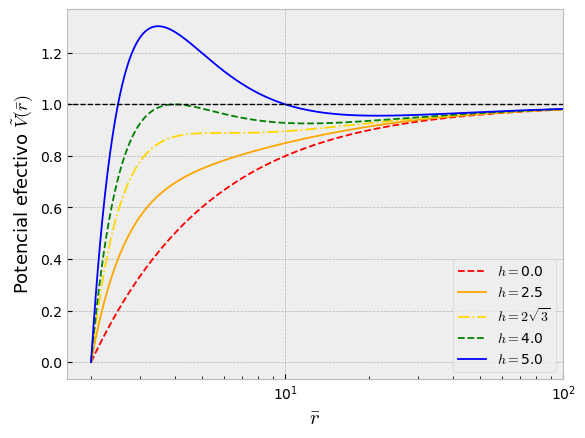

In [9]:
#Gráfica del potencial efectivo:
plt.plot(r,V(r,h[0]), color = colors[0], linewidth = 1.3, linestyle = '--', label = '$h = $'+str(h[0]))
plt.plot(r,V(r,h[1]), color = colors[1], linewidth = 1.3, label = '$h = $'+str(h[1]))
plt.plot(r,V(r,h[2]), color = colors[2], linewidth = 1.3, linestyle = '-.', label = '$h = 2\\sqrt{3}$')
plt.plot(r,V(r,h[3]), color = colors[3], linewidth = 1.3, linestyle = '--', label = '$h = $'+str(h[3]))
plt.plot(r,V(r,h[4]), color = colors[4], linewidth = 1.3, label = '$h = $'+str(h[4]))
plt.hlines(1.0,xmin= 0.0, xmax= r[-1], linewidth = 1, linestyles = '--', color = 'black')

plt.xscale('log')
plt.xlim(0,100)
plt.grid(True)
plt.legend(loc = 'best')

plt.xlabel('$\\bar{r}$',fontsize = 15)
plt.ylabel('Potencial efectivo $\\tilde{V}(\\bar{r})$',fontsize = 13)
plt.savefig('Potencial_Efectivo.pdf')

#### Solución numérica de la ecuación de las geodésicas tipo tiempo en la geometría de Schwarzchild

Las ecuaciones de la geodésica son:
\begin{aligned}
\ddot{t} +  \frac{2m}{r(r-2m)} \dot{t} \dot{r}&= 0, \\ 
\ddot{r} + \frac{mc^2(r-2m)}{r^3} \dot{t}^2 - \frac{m}{r(r-2m)} \dot{r}^2 - (r-2m) \left[\dot{\theta}^2 + \sin^2\theta \dot{\varphi}^2 \right]  &= 0,  \\
\ddot{\theta} + \frac{2}{r} \dot{r} \dot{\theta} - \sin\theta\cos\theta \dot{\varphi}^2 &= 0, \\
 \ddot{\varphi} + \frac{2}{r} \dot{r}\dot{\varphi} + 2 \frac{\cos\theta}{\sin \theta} \dot{\theta} \dot{\varphi} &= 0. 
\end{aligned}

In [10]:
#Definición del sistema de EDO's:
def dfdx(tau,f,args):
    #Definiciones de f = [t,r,theta,phi,dt,dr,dtheta,dphi]:
    t,r,th,ph,dt,dr,dth,dph = f
    
    #Variables extras:
    m, c = args

    #Sist. de EDO's:
    ddt = -(2*m*dt*dr)/(r*(r-2*m))
    ddr = - (m*c**2*(r-2*m)*dt**2)/(r**3) + (m*dr**2)/(r*(r-2*m)) + (r-2*m)*(dth**2 + np.sin(th)**2*dph**2)
    ddth = - (2*dr*dth)/r + np.sin(th)*np.cos(th)*dph**2 
    ddph = - (2*dr*dph)/r - (2*np.cos(th)*dth*dph)/np.sin(th)

    return [dt,dr,dth,dph,ddt,ddr,ddth,ddph]

In [11]:
#Cálculo del parámetro de masa m para el sistema solar:
G = 6.67430e-11 #[m^3 kg^-1 s^-2] 
c = 299792458 #[m/s]
M = 1.988e30  #[kg]

m = (G*M)/(c**2)

#### Órbita circular estable:

En el pdf de la semana 3 demostramos que se obtienen órbitas circulares estables con coordenada radial $r_c = cte$ con valores:
$$
\dot{t}_c = \frac{1}{\sqrt{1 - \frac{3m}{r_c}}}, \quad \dot{\varphi}_c = \frac{c}{r_c} \sqrt{\frac{m}{r_c - 3m}}.
$$

In [12]:
#Coordenada radial:
r_c = 7*m

#Condiciones iniciales:
t_0 = 0.0
r_0 = r_c
th_0 = np.pi/2
ph_0 = 0.0

dt_0 = 1/np.sqrt(1 - 3*m/r_c)
dr_0 = 0.0
dth_0 = 0.0
dph_0 = (c/r_c)*np.sqrt(m/(r_c-3*m))

f0 = [t_0,r_0,th_0,ph_0,dt_0,dr_0,dth_0,dph_0]

In [13]:
#Dominio de integración para tau (tiempo propio):
tau_max = 5*(2*np.pi/dph_0)             #5 vueltas
tau = np.linspace(0.0,tau_max,250)

#Integración numérica:
sol = solve_ivp(dfdx, t_span = [tau[0],tau[-1]], y0 = f0, args=([m,c],), method= 'RK45', t_eval = tau, rtol = 1e-8, atol = 1e-16)

In [14]:
#Función esféricas -> cartesianas:
def carte(r,ph,th):
    x = r*np.cos(ph)*np.sin(th)
    y = r*np.sin(ph)*np.sin(th)
    z = r*np.cos(th)  
    
    return [x,y,z]  

In [15]:
#Solución en coordenadas esféricas:
r = sol.y[1]
th = sol.y[2]
ph = sol.y[3]

#Solución en coordenadas cartesianas:
sol_carte = carte(r,ph,th)

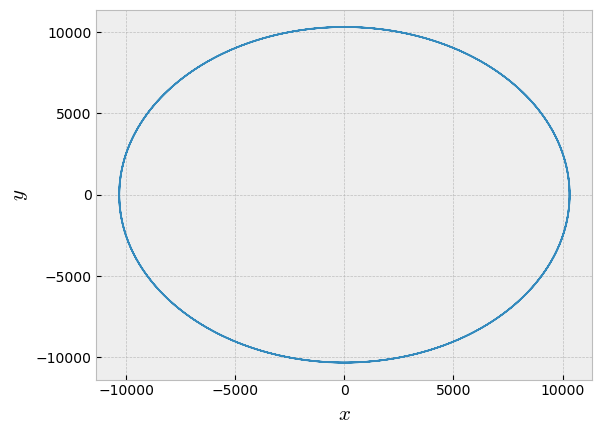

In [16]:
#Gráfica en el plano xy:
plt.plot(sol_carte[0],sol_carte[1],linewidth = 1)

plt.xlabel('$x$', fontsize = 15)
plt.ylabel('$y$', fontsize = 15)

plt.grid(True, linestyle = '--', alpha = 0.8)

In [17]:
#Animación en 3d de la órbita:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [18]:
#Función que actualiza los frames:
def update(i,sol):
    ax.cla()     #Clear axis

    x,y,z = sol

    ax.scatter(x[i-1],y[i-1],z[i-1],s = 80, marker = 'o', color = 'red')    #Cuerpo orbitante
    ax.plot(x[:i],y[:i],z[:i], linewidth = 1.0, color = 'red')              #Trayectoria del cuerpo
    ax.scatter(0,0,0,s = 100,marker = 'o', color = 'gold')                  #Masa central
               
    ax.set_xlim(-13000, 13000)
    ax.set_ylim(-13000, 13000)
    ax.set_zlim(-100, 100)

    ax.set_xlabel('$x$', fontsize = 15, labelpad=-10)
    ax.set_ylabel('$y$', fontsize = 15, labelpad=-10)
    ax.set_zlabel('$z$', fontsize = 15, labelpad=-10)

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])

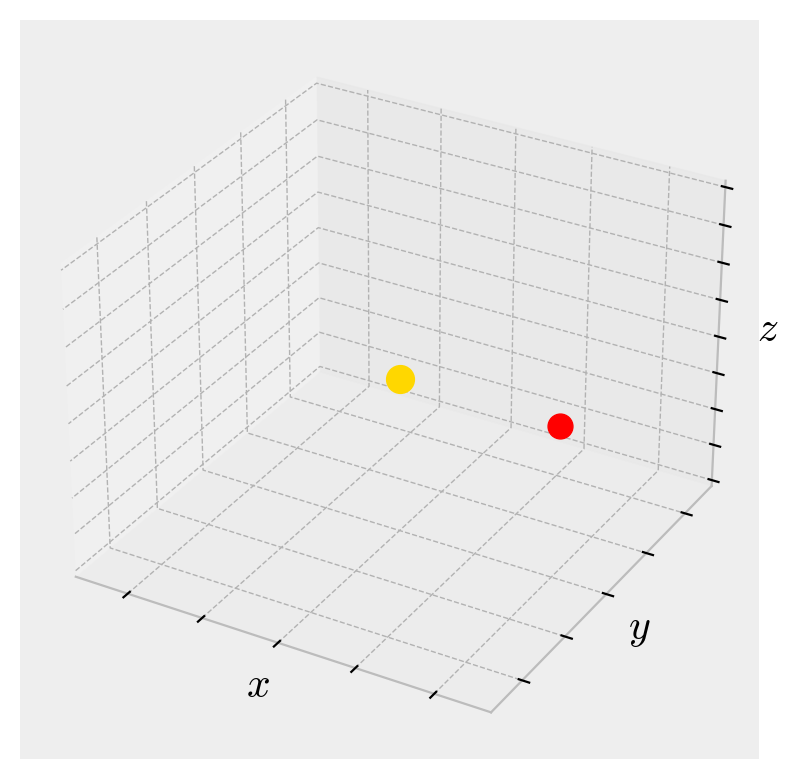

In [19]:
#Creación de la figura y ejes que contienen la animación:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection = '3d')

anim = animation.FuncAnimation(fig, func = update, fargs = (sol_carte,), frames = len(sol_carte[0]), interval = 1)
anim.save('Schwarzschild-orbita-circular-estable.gif')

#### Órbita circular inestable:

In [20]:
#Coordenada radial:
r_c = 3.001*m

#Condiciones iniciales:
t_0 = 0.0
r_0 = r_c
th_0 = np.pi/2
ph_0 = 0.0

dt_0 = 1/np.sqrt(1 - 3*m/r_c)
dr_0 = 0.0
dth_0 = 0.0
dph_0 = (c/r_c)*np.sqrt(m/(r_c-3*m))

f0 = [t_0,r_0,th_0,ph_0,dt_0,dr_0,dth_0,dph_0]

#Nota: se dan las mismas condiciones iniciales que para una órbita circular estable.

In [21]:
#Dominio de integración para tau (tiempo propio):
tau_max1 = 7*(2*np.pi/dph_0)     #5 vueltas
tau1 = np.linspace(0.0,tau_max1,250)

#Integración numérica:
sol1 = solve_ivp(dfdx, t_span = [tau1[0],tau1[-1]], y0 = f0, args=([m,c],), method= 'RK45', t_eval = tau1, rtol = 1e-8, atol = 1e-16)

In [22]:
#Solución en coordenadas esféricas:
r1 = sol1.y[1]
th1 = sol1.y[2]
ph1 = sol1.y[3]

#Solución en coordenadas cartesianas:
sol_carte1 = carte(r1,ph1,th1)

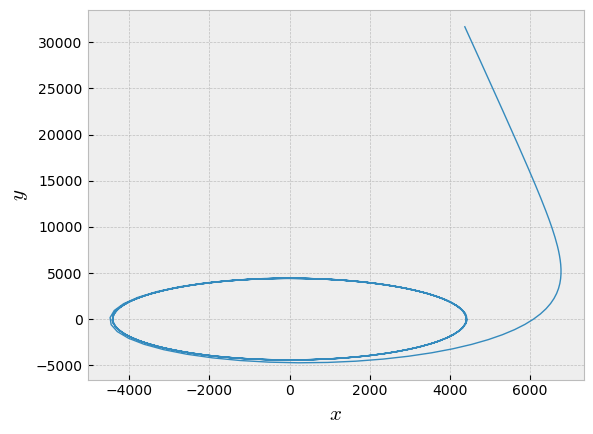

In [23]:
#Gráfica en el plano xy:
plt.plot(sol_carte1[0],sol_carte1[1],linewidth = 1)

plt.xlabel('$x$', fontsize = 15)
plt.ylabel('$y$', fontsize = 15)

plt.grid(True, linestyle = '--', alpha = 0.8)

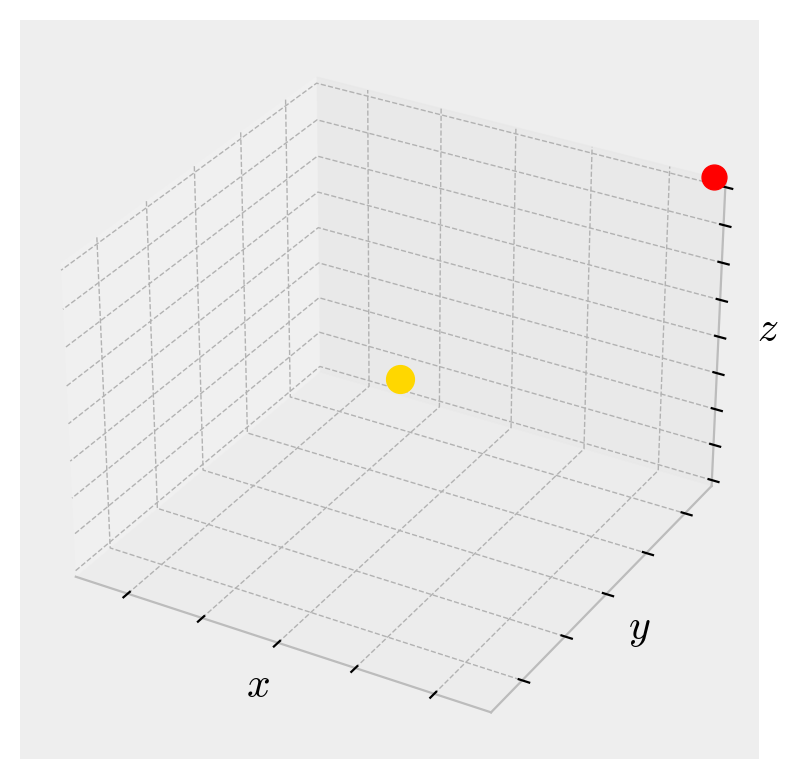

In [25]:
#Creación de la figura y ejes que contienen la animación:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection = '3d')

anim1 = animation.FuncAnimation(fig, func = update, fargs = (sol_carte1,), frames = len(sol_carte1[0]), interval = 1)
anim1.save('Schwarzschild-orbita-circular-inestable.gif')